
# Transform predict data for modeling

In [1]:
# import files

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime operations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 


In [2]:
# Load data csv
df1 = pd.read_csv('PredictRenew.csv', parse_dates=['AcctStart', 'BirthDate'])
print(df1.shape)
df1.head()

(9688, 13)


,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,Gender,16_Shops,16_Spend,17_Shops,17_Spend
0,66830310,2,1990-08-01,NaN,Y,NaN,NaN,NaT,NaN,9.0,2320.06,3.0,332.72
1,67077810,1,2010-02-01,NaN,NaN,NaN,NaN,1979-08-01,NaN,1.0,161.62,1.0,29.63
2,126587930,1,2007-02-01,NaN,NaN,NaN,NaN,1972-01-01,NaN,22.0,2972.14,28.0,3321.32
3,128106910,2,1986-08-01,NaN,Y,NaN,NaN,1963-06-01,2.0,4.0,1029.76,5.0,658.99
4,219859180,2,2003-07-01,NaN,Y,NaN,NaN,1978-12-01,NaN,6.0,938.82,5.0,876.55


In [3]:
# create features

df1['Duration'] = (df1['AcctStart'].sub(dt.date(2018,3,3))) * -1
df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'Y')
df1['Duration'] = df1.Duration.round(3)
df1.head() 

df1['Age'] = (df1['BirthDate'].sub(dt.date(2018,3,3))) * -1
df1['Age'] = df1['Age'] / np.timedelta64(1, 'Y')
df1['Age'] = df1.Age.round(3)
df1.head() 

,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,Gender,16_Shops,16_Spend,17_Shops,17_Spend,Duration,Age
0,66830310,2,1990-08-01,NaN,Y,NaN,NaN,NaT,NaN,9.0,2320.06,3.0,332.72,27.587,NaN
1,67077810,1,2010-02-01,NaN,NaN,NaN,NaN,1979-08-01,NaN,1.0,161.62,1.0,29.63,8.082,38.588
2,126587930,1,2007-02-01,NaN,NaN,NaN,NaN,1972-01-01,NaN,22.0,2972.14,28.0,3321.32,11.083,46.169
3,128106910,2,1986-08-01,NaN,Y,NaN,NaN,1963-06-01,2.0,4.0,1029.76,5.0,658.99,31.587,54.755
4,219859180,2,2003-07-01,NaN,Y,NaN,NaN,1978-12-01,NaN,6.0,938.82,5.0,876.55,14.672,39.253


In [4]:
# print unique values

print("AcctType values = ", pd.unique(df1['AcctType']))
print("ExecFlag values = ", pd.unique(df1['ExecFlag']))
print("CreditCardFlag values = ", pd.unique(df1['CreditCardFlag']))
print("AutoBillFlag values = ", pd.unique(df1['AutoBillFlag']))
print("Gender values = ", pd.unique(df1['Gender']))

('AcctType values = ', array([2, 1], dtype=int64))
('ExecFlag values = ', array(['Y', nan], dtype=object))
('CreditCardFlag values = ', array([nan, 'Y'], dtype=object))
('AutoBillFlag values = ', array([nan, 'Y'], dtype=object))
('Gender values = ', array([ nan,   2.,   1.]))


In [5]:
# create missing variable
df1['GMiss'] = df1['Gender'].isnull().astype(int)

In [6]:
# create dummy variable

df1 = pd.get_dummies(df1, columns=['Gender'])
df1.head()

,MbrID,AcctType,AcctStart,AcctExpire,ExecFlag,CreditCardFlag,AutoBillFlag,BirthDate,16_Shops,16_Spend,17_Shops,17_Spend,Duration,Age,GMiss,Gender_1.0,Gender_2.0
0,66830310,2,1990-08-01,NaN,Y,NaN,NaN,NaT,9.0,2320.06,3.0,332.72,27.587,NaN,1,0,0
1,67077810,1,2010-02-01,NaN,NaN,NaN,NaN,1979-08-01,1.0,161.62,1.0,29.63,8.082,38.588,1,0,0
2,126587930,1,2007-02-01,NaN,NaN,NaN,NaN,1972-01-01,22.0,2972.14,28.0,3321.32,11.083,46.169,1,0,0
3,128106910,2,1986-08-01,NaN,Y,NaN,NaN,1963-06-01,4.0,1029.76,5.0,658.99,31.587,54.755,0,0,1
4,219859180,2,2003-07-01,NaN,Y,NaN,NaN,1978-12-01,6.0,938.82,5.0,876.55,14.672,39.253,1,0,0


In [7]:
# Create indicator variables

df1.AcctType = df1.AcctType.eq(2).mul(1)

df1.ExecFlag.fillna(0, inplace=True)
df1.ExecFlag = df1.ExecFlag.eq('Y').mul(1)

df1.CreditCardFlag.fillna(0, inplace=True)
df1.CreditCardFlag = df1.CreditCardFlag.eq('Y').mul(1)

df1.AutoBillFlag.fillna(0, inplace=True)
df1.AutoBillFlag = df1.AutoBillFlag.eq('Y').mul(1)
df1.head()

print("AcctType values = ", pd.unique(df1['AcctType']))
print("ExecFlag values = ", pd.unique(df1['ExecFlag']))
print("CreditCardFlag values = ", pd.unique(df1['CreditCardFlag']))
print("AutoBillFlag values = ", pd.unique(df1['AutoBillFlag']))


('AcctType values = ', array([1, 0], dtype=int64))
('ExecFlag values = ', array([1, 0], dtype=int64))
('CreditCardFlag values = ', array([0, 1], dtype=int64))
('AutoBillFlag values = ', array([0, 1], dtype=int64))


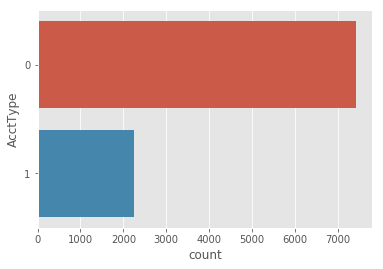

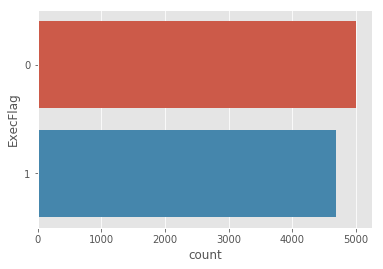

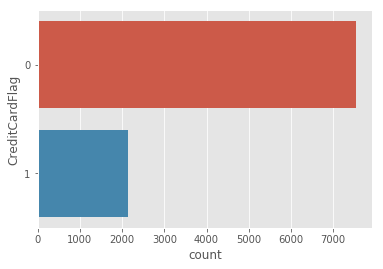

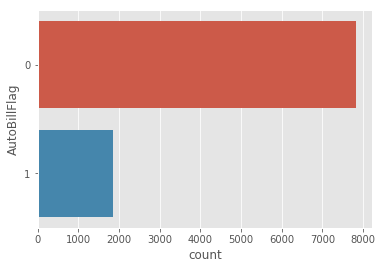

In [8]:
# Plot bar plot for each categorical feature
for feature in ['AcctType', 'ExecFlag', 'CreditCardFlag', 'AutoBillFlag']:
    sns.countplot(y=feature, data=df1)
    plt.show()

In [9]:
df1.shape

(9688, 17)

In [10]:
# create final dataframe

dataset = df1.drop([ 'MbrID', 'AcctStart','AcctExpire', 'BirthDate'], axis=1, inplace=False)
dataset = dataset.dropna()
dataset.head()

,AcctType,ExecFlag,CreditCardFlag,AutoBillFlag,16_Shops,16_Spend,17_Shops,17_Spend,Duration,Age,GMiss,Gender_1.0,Gender_2.0
1,0,0,0,0,1.0,161.62,1.0,29.63,8.082,38.588,1,0,0
2,0,0,0,0,22.0,2972.14,28.0,3321.32,11.083,46.169,1,0,0
3,1,1,0,0,4.0,1029.76,5.0,658.99,31.587,54.755,0,0,1
4,1,1,0,0,6.0,938.82,5.0,876.55,14.672,39.253,1,0,0
5,0,0,0,1,3.0,1068.61,5.0,1660.71,26.005,58.588,1,0,0


In [11]:
# save analytical base table into csv format

dataset.to_csv('test.csv', index=None)